In [36]:
import os
import cv2
import numpy as np
import tensorflow as tf
import sys

In [37]:
sys.path.append("..")

In [38]:
import utils

In [39]:
# Import utilites
from utils import label_map_util
from utils import visualization_utils as vis_util

In [40]:
# Name of the directory containing the object detection module we're using
MODEL_NAME = 'inference_graph'
PATH_TO_CKPT = MODEL_NAME + '/frozen_inference_graph.pb'
PATH_TO_LABELS = 'label_map.pbtxt'
IMAGE_NAME = '02827.jpg'
PATH_TO_IMAGE = '02827.jpg'

NUM_CLASSES = 3

In [41]:

import tensorflow.compat.v1 as tf

In [42]:
# Load the Tensorflow model into memory.
detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')

In [43]:
sess = tf.Session(graph=detection_graph)

In [44]:
image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')

In [45]:
detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')

In [46]:
detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')

In [47]:
num_detections = detection_graph.get_tensor_by_name('num_detections:0')

In [59]:
PATH_TO_TEST_IMAGES_DIR = 'test_images'
for i in range(0,5):
    TEST_IMAGE_PATHS = [os.path.join(PATH_TO_TEST_IMAGES_DIR, 'image{}.jpg'.format(i))]
IMAGE_SIZE = (20,20)

In [60]:
TEST_IMAGE_PATHS

['test_images\\image4.jpg']

In [61]:
from PIL import Image

In [62]:
def load_image_into_numpy_array(image):
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)
with detection_graph.as_default():
    for image_path in TEST_IMAGE_PATHS:
        image = Image.open(image_path)
        image_np = load_image_into_numpy_array(image)
        image_np_expanded = np.expand_dims(image_np, axis=0)
        boxes = detection_graph.get_tensor_by_name('detection_boxes:0')

In [63]:
(boxes, scores, classes, num) = sess.run(
    [detection_boxes, detection_scores, detection_classes, num_detections],
    feed_dict={image_tensor: image_np_expanded})

In [64]:
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

In [65]:

from io import StringIO
from collections import defaultdict
from PIL import Image
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt

In [66]:
import tkinter as tk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\SANTHOSH\Anaconda3\lib\tkinter\__init__.py", line 1883, in __call__
    return self.func(*args)
  File "C:\Users\SANTHOSH\Anaconda3\lib\tkinter\__init__.py", line 804, in callit
    func(*args)
  File "C:\Users\SANTHOSH\Anaconda3\lib\site-packages\matplotlib\backends\_backend_tk.py", line 270, in idle_draw
    self.draw()
  File "C:\Users\SANTHOSH\Anaconda3\lib\site-packages\matplotlib\backends\backend_tkagg.py", line 9, in draw
    super(FigureCanvasTkAgg, self).draw()
  File "C:\Users\SANTHOSH\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py", line 393, in draw
    self.figure.draw(self.renderer)
  File "C:\Users\SANTHOSH\Anaconda3\lib\site-packages\matplotlib\backend_bases.py", line 1556, in _draw
    def _draw(renderer): raise Done(renderer)
matplotlib.backend_bases._get_renderer.<locals>.Done: <matplotlib.backends.backend_agg.RendererAgg object at 0x000001CD8D7D81F0>
Exception in Tkinte

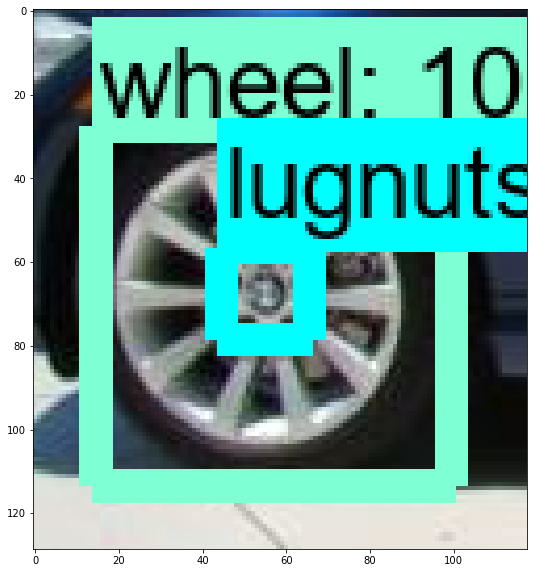

In [67]:
vis_util.visualize_boxes_and_labels_on_image_array(
    image_np,
    np.squeeze(boxes),
    np.squeeze(classes).astype(np.int32),
    np.squeeze(scores),
    category_index,
    use_normalized_coordinates=True,
    line_thickness=8,
    min_score_thresh=0.60)
plt.figure(figsize=IMAGE_SIZE)
plt.imshow(image_np)
plt.show()
#cv2.imshow('Ob', image_np)
#cv2.waitKey(0)
#cv2.destroyAllWindows()


In [23]:
!pip install tf_slim

In [24]:
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile

from distutils.version import StrictVersion
from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image

# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")
#from object_detection.utils import ops as utils_ops

if StrictVersion(tf.__version__) < StrictVersion('1.9.0'):
      raise ImportError('Please upgrade your TensorFlow installation to v1.9.* or later!')


In [25]:
%matplotlib inline

In [27]:
from utils import label_map_util

from utils import visualization_utils as vis_util

In [28]:

MODEL_NAME = 'inference_graph'
PATH_TO_FROZEN_GRAPH = MODEL_NAME + '/frozen_inference_graph.pb'
PATH_TO_LABELS = 'label_map.pbtxt'

In [29]:
import tensorflow.compat.v1 as tf

In [30]:
detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_FROZEN_GRAPH, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')

In [31]:
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)

In [32]:
def run_inference_for_single_image(image, graph):
    if 'detection_masks' in tensor_dict:
        # The following processing is only for single image
        detection_boxes = tf.squeeze(tensor_dict['detection_boxes'], [0])
        detection_masks = tf.squeeze(tensor_dict['detection_masks'], [0])
        # Reframe is required to translate mask from box coordinates to image coordinates and fit the image size.
        real_num_detection = tf.cast(tensor_dict['num_detections'][0], tf.int32)
        detection_boxes = tf.slice(detection_boxes, [0, 0], [real_num_detection, -1])
        detection_masks = tf.slice(detection_masks, [0, 0, 0], [real_num_detection, -1, -1])
        detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
            detection_masks, detection_boxes, image.shape[0], image.shape[1])
        detection_masks_reframed = tf.cast(
            tf.greater(detection_masks_reframed, 0.5), tf.uint8)
        # Follow the convention by adding back the batch dimension
        tensor_dict['detection_masks'] = tf.expand_dims(
            detection_masks_reframed, 0)
    image_tensor = tf.get_default_graph().get_tensor_by_name('image_tensor:0')

    # Run inference
    output_dict = sess.run(tensor_dict,
                            feed_dict={image_tensor: np.expand_dims(image, 0)})

    # all outputs are float32 numpy arrays, so convert types as appropriate
    output_dict['num_detections'] = int(output_dict['num_detections'][0])
    output_dict['detection_classes'] = output_dict[
        'detection_classes'][0].astype(np.uint8)
    output_dict['detection_boxes'] = output_dict['detection_boxes'][0]
    output_dict['detection_scores'] = output_dict['detection_scores'][0]
    if 'detection_masks' in output_dict:
        output_dict['detection_masks'] = output_dict['detection_masks'][0]
    return output_dict

In [68]:
import cv2
import numpy as np
cap = cv2.VideoCapture(0)
try:
    with detection_graph.as_default():
        with tf.Session() as sess:
                # Get handles to input and output tensors
                ops = tf.get_default_graph().get_operations()
                all_tensor_names = {output.name for op in ops for output in op.outputs}
                tensor_dict = {}
                for key in [
                  'num_detections', 'detection_boxes', 'detection_scores',
                  'detection_classes', 'detection_masks'
                ]:
                    tensor_name = key + ':0'
                    if tensor_name in all_tensor_names:
                        tensor_dict[key] = tf.get_default_graph().get_tensor_by_name(
                      tensor_name)

                while True:
                    ret, image_np = cap.read()
                    # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
                    image_np_expanded = np.expand_dims(image_np, axis=0)
                    # Actual detection.
                    output_dict = run_inference_for_single_image(image_np, detection_graph)
                    # Visualization of the results of a detection.
                    vis_util.visualize_boxes_and_labels_on_image_array(
                        image_np,
                        output_dict['detection_boxes'],
                        output_dict['detection_classes'],
                        output_dict['detection_scores'],
                        category_index,
                        instance_masks=output_dict.get('detection_masks'),
                        use_normalized_coordinates=True,
                        line_thickness=8)
                    cv2.imshow('object_detection', cv2.resize(image_np, (800, 600)))
                    if cv2.waitKey(25) & 0xFF == ord('q'):
                        cap.release()
                        cv2.destroyAllWindows()
                        break
except Exception as e:
    print(e)
    cap.release()